### **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sys, os, re, csv, codecs

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
stop_words = stopwords.words('english')
import html
import unicodedata

#import spacy
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt

import torch
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Load Train and Test Data**

In [ ]:
# load data
train = pd.read_csv('/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
test = pd.read_csv('/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
test_labels = pd.read_csv('/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip')
test_data = test.merge(test_labels, on='id')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### **Removing negative labels from test data as they are not valid as per description in competition**

In [ ]:
#print(len(test_data))
all_negative_rows = test_data[(test_data.iloc[:, 2:8] == -1).all(axis=1)]
#print(len(all_negative_rows))
test_data = test_data.drop(all_negative_rows.index)
len(test_data)
#test_data

63978

### **Output dataframes capturing probabilities and comparison of true and predicted labels**

In [ ]:
sample_submission = pd.DataFrame({'id':[],	'toxic':[],	'severe_toxic':[],	'obscene':[],	'threat':[],
              'insult':[],	'identity_hate':[]})
sample_submission[['id']] = test_data[['id']]
#len(sample_submission[['id']])
#sample_submission.head()
test_data_comparison = pd.DataFrame({'id':[],	'comment_text':[], 'toxic_TRUE_LBL':[],	'toxic_PRED_LBL':[],'severe_toxic_TRUE_LBL':[],
                                     'severe_toxic_PRED_LBL':[],'obscene_TRUE_LBL':[],	'obscene_PRED_LBL':[],
                                     'threat_TRUE_LBL':[],	'threat_PRED_LBL':[], 'insult_TRUE_LBL':[],	'insult_PRED_LBL':[],
                                     'identity_hate_TRUE_LBL':[], 'identity_hate_PRED_LBL':[]})
test_data_comparison[['id']] = test_data[['id']]
test_data_comparison[['comment_text']] = test_data[['comment_text']]
#test_data_comparison
test_data_comparison.head()

,id,comment_text,toxic_TRUE_LBL,toxic_PRED_LBL,severe_toxic_TRUE_LBL,severe_toxic_PRED_LBL,obscene_TRUE_LBL,obscene_PRED_LBL,threat_TRUE_LBL,threat_PRED_LBL,insult_TRUE_LBL,insult_PRED_LBL,identity_hate_TRUE_LBL,identity_hate_PRED_LBL
5,0001ea8717f6de06,Thank you for understanding. I think very high...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,000247e83dcc1211,:Dear god this site is horrible.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Correlation of labels in Training dataset**

### **Text preprocessing**

1.   Text Cleaning (both on train and test)
2.   tokenization (both on train and test)

1.   Built vocabulary (using training dataset only)
2.   Formed sequences from tokens (both on train and test - used MAXLEN as 100 tokens)








In [ ]:
train["comment_text"].fillna("fillna")
test_data["comment_text"].fillna("fillna")
X_train = train["comment_text"].str.lower()
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

X_test = test_data["comment_text"].str.lower()
y_test = test_data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using {device} device")

Using cuda device


In [ ]:
import string

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def clean_text( text):
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

train['comment_text'] = train['comment_text'].apply(lambda x: clean_text(x))
train.sample(1)['comment_text'].values[0]

'hi know talk page work criterion narrow discuss reply editor post way end become general discussion disrespect ignore know please stop passive aggressive behaviour'

In [ ]:
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: clean_text(x))

In [ ]:
class Vocabulary:
    def __init__(self, word_counter, min_freq=1):
        self.word2idx = {'<unk>': 0}  # <unk> for unknown words
        self.idx2word = {0: '<unk>'}
        idx = 1
        for word, count in word_counter.items():
            if count >= min_freq:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                idx += 1

    def lookup_index(self, word):
        return self.word2idx.get(word, self.word2idx['<unk>'])

    def lookup_indices(self, words):
        return [self.lookup_index(word) for word in words]


In [ ]:
class Vocabulary:
    def __init__(self, word_counter, min_freq=1):
        self.word2idx = {'<unk>': 0, '<pad>':1}  # <unk> for unknown words
        self.idx2word = {0: '<unk>', 1: '<pad>'}
        idx = 2
        for word, count in word_counter.items():
            if count >= min_freq:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                idx += 1

    def __len__(self):
        return len(self.word2idx)

    def lookup_index(self, word):
        return self.word2idx.get(word, self.word2idx['<unk>'])

    def lookup_indices(self, words):
        return [self.lookup_index(word) for word in words]


In [ ]:
from nltk.tokenize import word_tokenize
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
def tokenize(text):
    return word_tokenize(text)
# Tokenize train and test data
x_train_tok = [tokenize(text) for text in train['comment_text']]
x_test_tok = [tokenize(text) for text in test_data['comment_text']]

# Create vocabulary
word_counter = Counter([word for text in x_train_tok for word in text])
vocab = Vocabulary(word_counter, min_freq=1)

# Convert tokens to indices
x_train_indices = [vocab.lookup_indices(text) for text in x_train_tok]
x_test_indices = [vocab.lookup_indices(text) for text in x_test_tok]

# Pad sequences (assuming a maximum sequence length of 50)
max_len = 100
x_train_pad = pad_sequence([torch.tensor(seq[:max_len]) for seq in x_train_indices], batch_first=True, padding_value=0)
x_test_pad = pad_sequence([torch.tensor(seq[:max_len]) for seq in x_test_indices], batch_first=True, padding_value=0)

In [ ]:
#length of maximum document
max_len=0
max_len = max([len(t) for t in x_train_tok])

print("The maximum number of words in all documents is : " , max_len)

The maximum number of words in all documents is :  1250


In [ ]:
unique_vocab = len(vocab)
unique_vocab

208757

In [ ]:
x_train_pad[0]

tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

### BiLTSM


*  Split train dataset into validation and training sets
*  Layers in this BiLTSM model are gien below




1.   Embedding layer (Size of vocabulary to 128)
1.   One BiLTSM  (128 to 512)
2.   One LTSM  (1024 to 128)

1.   Linear Fully connected layer (128 to 16)
2.   Linear Fully connected layer (16 to 6)

1.   Activation layers - ReLU and sigmoid













In [ ]:
X = x_train_pad
y = train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
y = torch.tensor(y.iloc[:, 0:6].values)

In [ ]:

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

x_test = x_test_pad
y_test = test_data[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
y_test = torch.tensor(y_test.iloc[:, 0:6].values)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class CommentAnalysisModel(nn.Module):
    def __init__(self, unique_vocab, embedding_dim, hidden_dim):
        super(CommentAnalysisModel, self).__init__()
        self.embedding = nn.Embedding(unique_vocab, embedding_dim)
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim, dropout=0.2, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_dim*2, 128, dropout=0.2, batch_first=True)
        self.fc1 = nn.Linear(128, 16)
        self.fc2 = nn.Linear(16, 6)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out1, _ = self.lstm1(embedded)
        lstm_out2, _ = self.lstm2(lstm_out1)
        x = lstm_out2[:, -1, :]  # Extract the last hidden state
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize the model
embedding_dim = 128
hidden_dim = 512
unique_vocab = len(vocab)
model = CommentAnalysisModel(unique_vocab, embedding_dim, hidden_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adamax(model.parameters())


# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


CommentAnalysisModel(
  (embedding): Embedding(208757, 128)
  (lstm1): LSTM(128, 512, batch_first=True, dropout=0.2, bidirectional=True)
  (lstm2): LSTM(1024, 128, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=128, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=6, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

# **Model Training Function**


1.   Function has computation for validation accuracy as well
2.   Used Adam optimizer and BCE loss





In [ ]:
from tqdm import tqdm

# Define the training function
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs):
    train_loss = []
    valid_acc = []

    num_classes = 6
    model.to(device)
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the appropriate device
            labels = labels.float()  # Convert labels to float
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the parameters
            epoch_loss += loss.item() * inputs.size(0)  # Accumulate the loss

        # Compute training loss
        epoch_loss /= len(train_loader.dataset)  # Average loss for the epoch
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}")
        train_loss.append(epoch_loss)

        # Compute validation accuracy per label
        model.eval()  # Set the model to evaluation mode
        correct = {label: 0 for label in range(num_classes)}  # Dictionary to store correct predictions per label
        total = {label: 0 for label in range(num_classes)}  # Dictionary to store total predictions per label
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.float()  # Convert labels to float
                outputs = model(inputs)
                predicted = (outputs > 0.5).int()  # Convert probabilities to binary predictions
                for label in range(num_classes):
                    correct[label] += ((predicted[:, label] == labels[:, label]) & (labels[:, label] != -1)).sum().item()
                    total[label] += (labels[:, label] != -1).sum().item()

        # Compute validation accuracy per label and average over all labels
        label_accuracies = {label: correct[label] / total[label] for label in range(num_classes) if total[label] != 0}
        avg_valid_acc = sum(label_accuracies.values()) / len(label_accuracies)
        print(f"Epoch {epoch + 1}/{num_epochs}, Avg Valid Acc: {avg_valid_acc:.4f}")
        valid_acc.append(avg_valid_acc)


    model_name = 'NLP_toxic_comment_model_05_03.pt'
    torch.save(model.state_dict(), model_name)
    return train_loss, valid_acc

# DataSet Creation


1.   Simple dataset class extended from Dataset required for loader of train, validation and test datasets



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CommentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        return text, label


In [ ]:
def collate_batch(batch):
    texts, labels = zip(*batch)
    #print(texts)
    tokens = torch.stack(texts)
    labels = torch.stack(labels)
    #print(labels.dtype)

    return tokens, labels

In [ ]:


train_dataset = CommentDataset(x_train, y_train)
valid_dataset = CommentDataset(x_valid, y_valid)
test_dataset = CommentDataset(x_test, y_test)

BATCH_SIZE = 512

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)

# **Model Training**



1.   Trained over 8 epochs (Tried 10 and 50 epochs, 5 epochs yielded better results)
2.   Validation accuracies and training losses improved progressively with epochs (Plots showing progress)



In [ ]:
num_epochs = 8
train_loss, valid_acc = train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs)

Epoch 1/8: 100%|██████████| 250/250 [01:09<00:00,  3.60it/s]


Epoch 1/8, Train Loss: 0.1747
Epoch 1/8, Avg Valid Acc: 0.9629


Epoch 2/8: 100%|██████████| 250/250 [01:13<00:00,  3.38it/s]


Epoch 2/8, Train Loss: 0.1402
Epoch 2/8, Avg Valid Acc: 0.9629


Epoch 3/8: 100%|██████████| 250/250 [01:16<00:00,  3.27it/s]


Epoch 3/8, Train Loss: 0.1312
Epoch 3/8, Avg Valid Acc: 0.9628


Epoch 4/8: 100%|██████████| 250/250 [01:17<00:00,  3.22it/s]


Epoch 4/8, Train Loss: 0.0999
Epoch 4/8, Avg Valid Acc: 0.9734


Epoch 5/8: 100%|██████████| 250/250 [01:19<00:00,  3.16it/s]


Epoch 5/8, Train Loss: 0.0734
Epoch 5/8, Avg Valid Acc: 0.9782


Epoch 6/8: 100%|██████████| 250/250 [01:19<00:00,  3.14it/s]


Epoch 6/8, Train Loss: 0.0620
Epoch 6/8, Avg Valid Acc: 0.9786


Epoch 7/8: 100%|██████████| 250/250 [01:20<00:00,  3.10it/s]


Epoch 7/8, Train Loss: 0.0561
Epoch 7/8, Avg Valid Acc: 0.9802


Epoch 8/8: 100%|██████████| 250/250 [01:19<00:00,  3.13it/s]


Epoch 8/8, Train Loss: 0.0526
Epoch 8/8, Avg Valid Acc: 0.9806


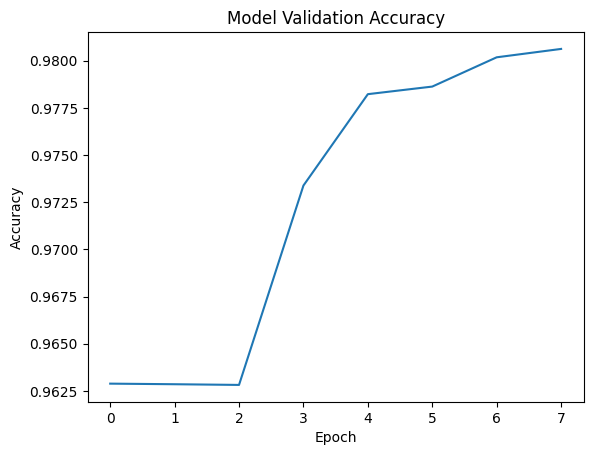

In [ ]:
plt.plot(valid_acc)
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

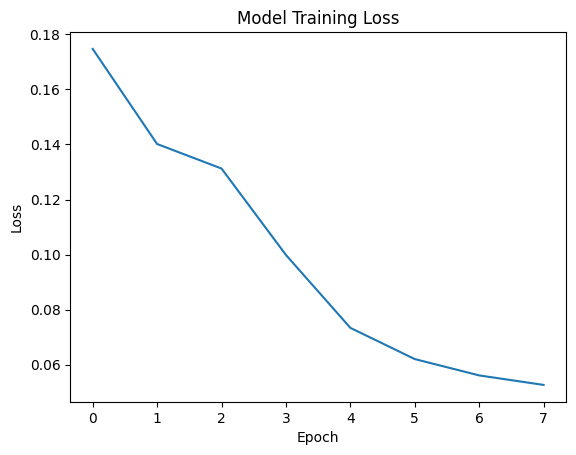

In [ ]:
plt.plot(train_loss)
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Evaluation on Test dataset


1.   Stored output probabilities across respective classes in sample_submission dataframe, which later saved as submission.csv
2.   Calculated and printed test accuracy over all labels

1.   Stored true and predicted labels in a dataframe (test_data_comparison)
2.   test_data_comparison is displayed for 10 items showing true and predicted labels with comment in place

1.   Computed and displayed mult-label confusion matrix across 6 different classes







In [ ]:
def evaluate_model(model, test_loader,test_data_comparison):
    num_classes = 6
    model.to(device)
    # Compute validation accuracy per label
    model.eval()  # Set the model to evaluation mode
    correct = {label: 0 for label in range(num_classes)}  # Dictionary to store correct predictions per label
    total = {label: 0 for label in range(num_classes)}  # Dictionary
 to store total predictions per label
    toxic_probs = []
    severe_toxic_probs = []
    obscene_probs = []
    threat_probs = []
    insult_probs = []
    identity_hate_probs = []
    true_labels = {label: [] for label in range(num_classes)}
    pred_labels = {label: [] for label in range(num_classes)}
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.float()  # Convert labels to float
            outputs = model(inputs)
            #print(outputs.shape)
            predicted = (outputs.float() > 0.5).int()  # Convert probabilities to binary predictions
            toxic_probs.append(outputs[:,0].cpu().numpy())
            severe_toxic_probs.append(outputs[:,1].cpu().numpy())
            obscene_probs.append(outputs[:,2].cpu().numpy())
            threat_probs.append(outputs[:,3].cpu().numpy())
            insult_probs.append(outputs[:,4].cpu().numpy())
            identity_hate_probs.append(outputs[:,5].cpu().numpy())
            for label in range(num_classes):
                correct[label] += ((predicted[:, label] == labels[:, label]) & (labels[:, label] != -1)).sum().item()
                total[label] += (labels[:, label] != -1).sum().item()
                pred_labels[label].append(predicted[:, label].cpu().numpy().astype(int))
                true_labels[label].append(labels[:, label].cpu().numpy())
    #print(toxic_probs)
    sample_submission['toxic'] = np.concatenate(toxic_probs)
    sample_submission['severe_toxic'] = np.concatenate(severe_toxic_probs)
    sample_submission['obscene'] = np.concatenate(obscene_probs)
    sample_submission['threat'] = np.concatenate(threat_probs)
    sample_submission['insult'] = np.concatenate(insult_probs)
    sample_submission['identity_hate'] = np.concatenate(identity_hate_probs)
    sample_submission.to_csv('submission.csv', index=False)
    test_data_comparison['toxic_TRUE_LBL'] = np.concatenate(true_labels[0])
    test_data_comparison['toxic_PRED_LBL'] = np.concatenate(pred_labels[0])
    test_data_comparison['severe_toxic_TRUE_LBL'] = np.concatenate(true_labels[1])
    test_data_comparison['severe_toxic_PRED_LBL'] = np.concatenate(pred_labels[1])
    test_data_comparison['obscene_TRUE_LBL'] = np.concatenate(true_labels[2])
    test_data_comparison['obscene_PRED_LBL'] = np.concatenate(pred_labels[2])
    test_data_comparison['threat_TRUE_LBL'] = np.concatenate(true_labels[3])
    test_data_comparison['threat_PRED_LBL'] = np.concatenate(pred_labels[3])
    test_data_comparison['insult_TRUE_LBL'] = np.concatenate(true_labels[4])
    test_data_comparison['insult_PRED_LBL'] = np.concatenate(pred_labels[4])
    test_data_comparison['identity_hate_TRUE_LBL'] = np.concatenate(true_labels[5])
    test_data_comparison['identity_hate_PRED_LBL'] = np.concatenate(pred_labels[5])
    # Compute validation accuracy per label and average over all labels
    label_accuracies = {label: correct[label] / total[label] for label in range(num_classes) if total[label] != 0}
    avg_test_acc = sum(label_accuracies.values()) / len(label_accuracies)
    return avg_test_acc, test_data_comparison,label_accuracies

In [ ]:
test_accuracy,test_data_comparison,label_accuracies = evaluate_model(model, test_loader,test_data_comparison)
print(f"Test Accuracy in toxic label: {label_accuracies[0]*100:.4f}%")
print(f"Test Accuracy in severe_toxic label: {label_accuracies[1]*100:.4f}%")
print(f"Test Accuracy in obscene label: {label_accuracies[2]*100:.4f}%")
print(f"Test Accuracy in threat label: {label_accuracies[3]*100:.4f}%")
print(f"Test Accuracy in insult label: {label_accuracies[4]*100:.4f}%")
print(f"Test Accuracy in identity_hate label: {label_accuracies[5]*100:.4f}%")
print(f"Overall Test Accuracy: {test_accuracy*100:.4f}%")

Test Accuracy in toxic label: 92.4130%
Test Accuracy in severe_toxic label: 99.4311%
Test Accuracy in obscene label: 96.2221%
Test Accuracy in threat label: 99.6702%
Test Accuracy in insult label: 95.6626%
Test Accuracy in identity_hate label: 98.8871%
Overall Test Accuracy: 97.0477%


In [ ]:
test_data_comparison.iloc[20:30]

,id,comment_text,toxic_TRUE_LBL,toxic_PRED_LBL,severe_toxic_TRUE_LBL,severe_toxic_PRED_LBL,obscene_TRUE_LBL,obscene_PRED_LBL,threat_TRUE_LBL,threat_PRED_LBL,insult_TRUE_LBL,insult_PRED_LBL,identity_hate_TRUE_LBL,identity_hate_PRED_LBL
43,0012bb72f20ae971,""" \n\n == Ref: SS Ponzi Scheme == \n\n Hi Padi...",0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
45,00137446b1aec28c,== September 20th Truce == \n\n According to s...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
46,0013a435effa29bd,"I'd never think I'd need to say it, but Wikipe...",0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
47,0013be435187e84f,But this is not the article about government p...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
48,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,1.0,1,0.0,0,1.0,1,0.0,0,1.0,1,1.0,0
49,001411adf8f1dd82,== Dracula's Grandmother == \n\n \n Dracula's...,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
51,001426f56de6a49b,*I agree with Billfruge. The author describes ...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
56,0016b94c8b20ffa6,I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
58,00177176f33f587e,== Can you work your magic? == \n\n Hi. I was...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
59,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",1.0,1,0.0,0,1.0,1,0.0,0,1.0,1,0.0,0


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

true_labels = test_data_comparison[['toxic_TRUE_LBL', 'severe_toxic_TRUE_LBL', 'obscene_TRUE_LBL', 'threat_TRUE_LBL', 'insult_TRUE_LBL', 'identity_hate_TRUE_LBL']]
pred_labels = test_data_comparison[['toxic_PRED_LBL' , 'severe_toxic_PRED_LBL', 'obscene_PRED_LBL', 'threat_PRED_LBL', 'insult_PRED_LBL', 'identity_hate_PRED_LBL']]

mcm = multilabel_confusion_matrix(true_labels, pred_labels)